In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import colors
import matplotlib.ticker as ticker
from scipy.stats import sem


import sys
sys.path.append('..')
sys.path.append('../../../code')
from lib import *
plt.style.use('../../../code/peptidome.mplstyle')
from lib.plotting import model_labels as labels

datadir = '../../../generated_data'
figdatadir = './'

In [3]:
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

In [4]:
all_assays = pd.read_csv('all_assays.csv')
error = np.array(all_assays['lower'],all_assays['upper'])

In [5]:
response_df = pd.read_csv('response_vs_distance_non_elispot.csv')

In [6]:
response_df

,nndist,mean,count
0,0,0.600000,10
1,1,0.726891,238
2,2,0.591667,1440
3,3,0.629205,1308


In [7]:
response_df['observed'] = response_df.apply(lambda row: row['mean']*row['count'],axis=1)
close = response_df[response_df['nndist']!=3].sum()[['count', 'observed']]
far = response_df[response_df['nndist']==3].sum()[['count', 'observed']]
arg1 = np.array([close['observed'],far['observed']])
arg2 = np.array([close['count'],far['count']])
stat, pval = statsmodels.stats.proportion.proportions_ztest(arg1,arg2)

pval

np.float64(0.30312812066800854)

In [8]:
ps = np.array(response_df['mean'])
ns = np.array(response_df['count'])

In [9]:
epidist = pd.read_csv('epidist_non_elispot.csv')

In [10]:
order = ['Human Peptidome', 'Malaria Peptidome', 'Malaria Epitopes (-)', 'Malaria Epitopes']
source_mapper = {
    'Malaria Peptidome': 'Malaria Peptides',
    'Malaria Epitopes (-)': 'Non-Immunogenic Epitopes',
    'Malaria Epitopes (+)': 'Immunogenic Epitopes',

}

In [11]:
distances_df = pd.read_csv(f'{figdatadir}/malaria_distances_all_assays.csv')
distances_df['source'] = distances_df['source'].apply(source_mapper.get)

In [12]:
rows = []
for i, source in enumerate(distances_df['source'].unique()):
    x = np.array(range(2))
    y = np.squeeze(distances_df[(distances_df['source']==source)&(distances_df['distance']=='3+')]['value'])
    rows.append({
        'source': source,
        'distance': '<=2',
        'value': 1-y,
    })
    rows.append({
        'source': source,
        'distance': '>3',
        'value': y

    })
collapsed_df = pd.DataFrame(data=rows)

In [13]:
total_df = collapsed_df.groupby(by=['source']).sum()[['value']]

In [14]:
malaria_abundance_df = pd.read_csv('malaria_abundance_all_assays.csv')
source_mapper = {
    'background': 'Malaria Peptides',
    'negative': 'Non-Immunogenic Epitopes',
    'positive': 'Immunogenic Epitopes',

}
malaria_abundance_df['source'] = malaria_abundance_df['source'].apply(source_mapper.get)

In [15]:
with open(f'{figdatadir}/malaria_pdf_all_assays.json','r') as ff:
    density_dict = json.load(ff)

/scratch/lsftmp/10902083.tmpdir/ipykernel_54263/2817699764.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos = distances_df[epidist['Immunogenic']]['distance']
/scratch/lsftmp/10902083.tmpdir/ipykernel_54263/2817699764.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neg = distances_df[~epidist['Immunogenic']]['distance']


KstestResult(statistic=np.float64(0.375), pvalue=np.float64(0.8363636363636363), statistic_location='2', statistic_sign=np.int8(-1))

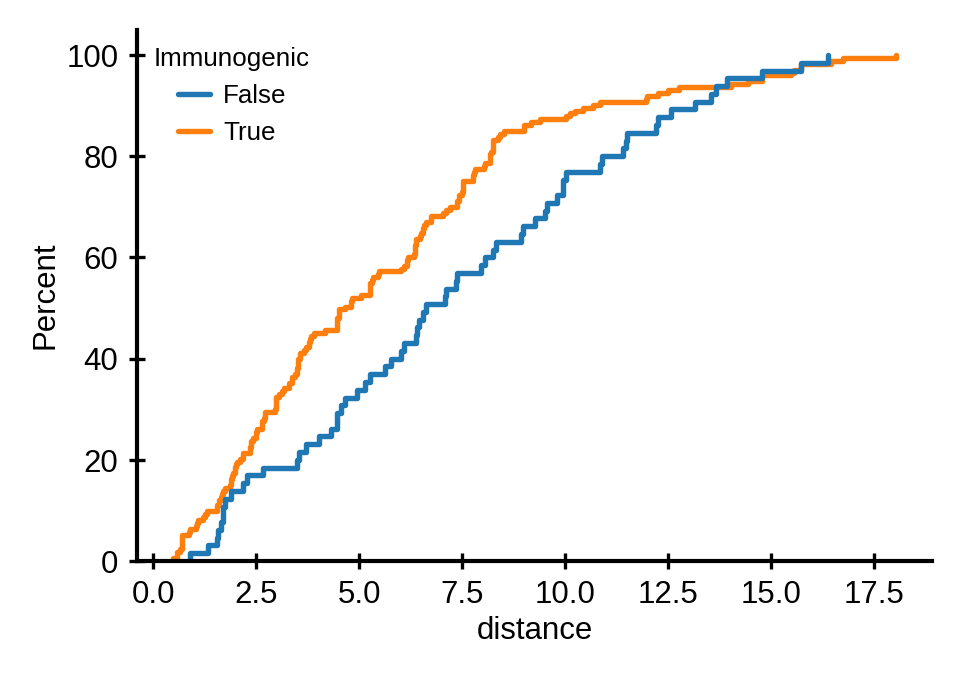

In [17]:
sns.ecdfplot(epidist,x="distance",hue='Immunogenic',stat='percent',complementary=False)
pos = distances_df[epidist['Immunogenic']]['distance']
neg = distances_df[~epidist['Immunogenic']]['distance']
scipy.stats.ks_2samp(pos,neg)

/scratch/lsftmp/10902083.tmpdir/ipykernel_54263/4065567927.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(['All P. Falciparum\nPeptides','Non-Immunogenic\nP. Falciparum\nPeptides','Immunogenic\nP. Falciparum\nPeptides'],rotation=0,fontsize=9)
/scratch/lsftmp/10902083.tmpdir/ipykernel_54263/4065567927.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_xticklabels(['All P. Falciparum\nPeptides','Non-Immunogenic\nP. Falciparum\nPeptides','Immunogenic\nP. Falciparum\nPeptides'],rotation=0,fontsize=9)


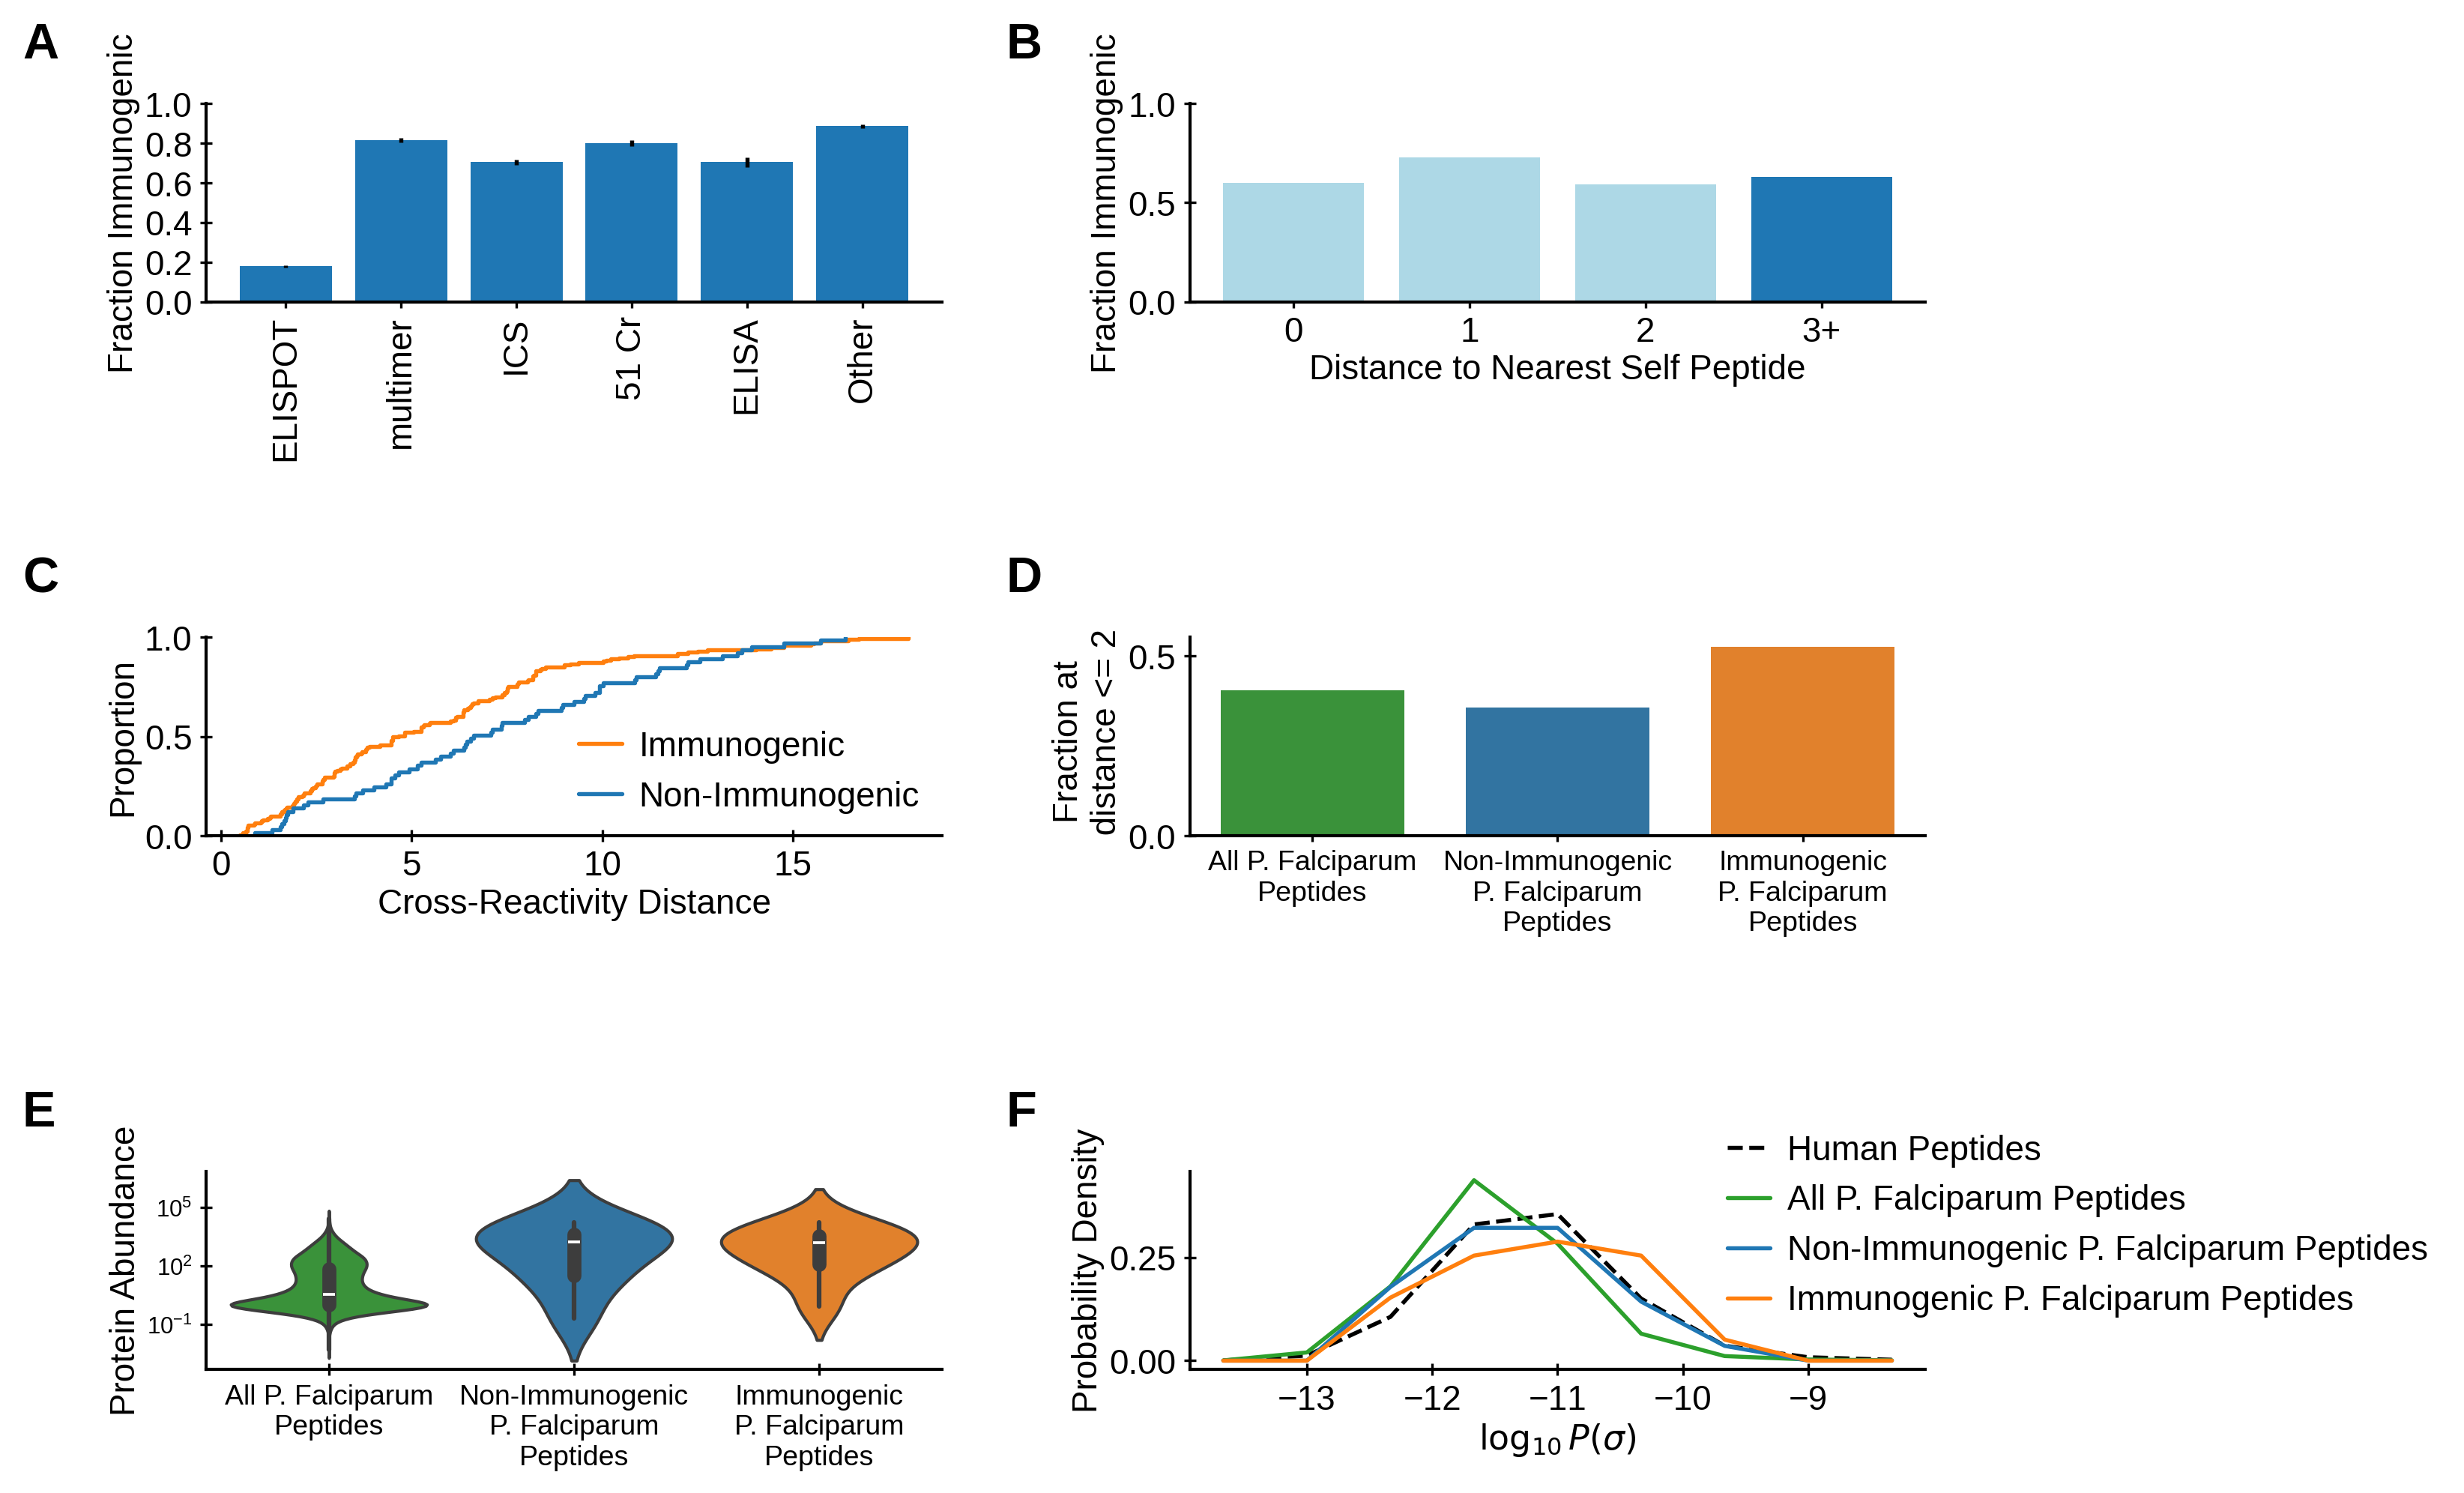

In [19]:
fig = plt.figure(figsize=(11, 7))

blue = '#1f77b4'
orange = '#ff7f0e'
green = '#2ca02c'

order_colors = {
 'Malaria Peptidome': green,
 'Malaria Epitopes (-)': blue,
 'Malaria Epitopes': orange
    
}

axfontsize = 11

# Define a GridSpec with 3 rows and 2 columns
gs = gridspec.GridSpec(3, 2)

# Create the first four subplots in a 2x2 grid
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])

ax1.bar(all_assays['Assay'],
            all_assays['Fraction'],
            yerr=error)
ax1.set_ylim(0.0, 1.0)
ax1.set_yticks(np.arange(0.0, 1.01, 0.2))
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_ylabel('Fraction Immunogenic',fontsize=axfontsize)
ax1.yaxis.set_tick_params(labelsize=axfontsize)
ax1.xaxis.set_tick_params(labelsize=axfontsize)



# lower, upper = statsmodels.stats.proportion.proportion_confint(ps*ns, ns, method='jeffreys', alpha=.1)
# ax1.errorbar(range(len(ps)), ps, yerr=[ps-lower, upper-ps], ls='None', fmt='o',ms=5)
# ax1.bar(range(len(ps)), ps,yerr=[lower,upper],capsize=1)
ax2.bar(range(len(ps)), ps,color=['lightblue','lightblue','lightblue', blue])

ax2.set_ylim(0.0, 1)
ax2.set_xlabel('Distance to Nearest Self Peptide',fontsize=axfontsize)
ax2.set_ylabel('Fraction Immunogenic',fontsize=axfontsize)
ax2.set_xticks([0, 1, 2, 3])
ax2.set_xticklabels([0, 1, 2, '3+'],fontsize=axfontsize)
ax2.yaxis.set_tick_params(labelsize=axfontsize)


# sns.swarmplot(data=epidist, x='Immunogenic', y='distance', ax=ax3, s=3,hue='Immunogenic',legend=False)
# sns.boxplot(data=epidist, x='Immunogenic', y='distance', color='white', showfliers=False, whis=0, ax=ax3)

# ax3.set_ylabel('Cross-reactivity Distance',fontsize=axfontsize)
# ax3.set_xlabel('Immunogenic',fontsize=axfontsize)
# ax3.yaxis.set_tick_params(labelsize=axfontsize)
# ax3.xaxis.set_tick_params(labelsize=axfontsize)
sns.ecdfplot(epidist,x="distance",hue='Immunogenic',ax=ax3,legend=False)

ax3.legend(loc='lower right', labels=['Immunogenic', 'Non-Immunogenic'],fontsize=axfontsize)
ax3.set_xlabel('Cross-Reactivity Distance',fontsize=axfontsize)
ax3.set_ylabel('Proportion',fontsize=axfontsize)
ax3.yaxis.set_tick_params(labelsize=axfontsize)
ax3.xaxis.set_tick_params(labelsize=axfontsize)


sns.barplot(x="source", y="value", width=.75,
                   data=collapsed_df[collapsed_df['distance']=='<=2'],
                   hue_order=['Non-Immunogenic Epitopes', 'Immunogenic Epitopes', 'Malaria Peptides'],
                   hue="source",legend=False,order=list(source_mapper.values()),ax=ax4)

ax4.set_xticklabels(['All P. Falciparum\nPeptides','Non-Immunogenic\nP. Falciparum\nPeptides','Immunogenic\nP. Falciparum\nPeptides'],rotation=0,fontsize=9)

ax4.set_xlabel('')
ax4.set_ylabel('Fraction at \n distance <= 2',fontsize=axfontsize)

ax4.yaxis.set_tick_params(labelsize=axfontsize)



sns.violinplot(data=malaria_abundance_df, x='source',
               y='value', ax=ax5,hue='source',
               legend=False,log_scale=True,
               hue_order=['Immunogenic Epitopes', 'Non-Immunogenic Epitopes', 'Malaria Peptides'])
ax5.set_xlabel('')
ax5.set_ylabel('Protein Abundance',fontsize=axfontsize)
ax5.set_xticklabels(['All P. Falciparum\nPeptides','Non-Immunogenic\nP. Falciparum\nPeptides','Immunogenic\nP. Falciparum\nPeptides'],rotation=0,fontsize=9)


labels_dict = {
    'Human Peptidome': 'Human Peptides',
    'Malaria Peptidome': 'All P. Falciparum Peptides',
    'Malaria Epitopes': 'Immunogenic P. Falciparum Peptides',
    'Malaria Epitopes (-)': 'Non-Immunogenic P. Falciparum Peptides'
}

for dataset in order:
    bins = np.array(density_dict[dataset]['bins'])
    pdf = np.array(density_dict[dataset]['pdf'])
# density
    if dataset.startswith('Human'):
        ax6.plot(0.5*(bins[:-1]+bins[1:]), pdf ,'k--',label=labels_dict[dataset])
    else:
        ax6.plot(0.5*(bins[:-1]+bins[1:]), pdf ,color=order_colors[dataset],label=labels_dict[dataset])

ax6.set_xlabel(r'$\log_{10} P(\sigma)$',fontsize=axfontsize)
ax6.xaxis.set_tick_params(labelsize=axfontsize)
ax6.yaxis.set_tick_params(labelsize=axfontsize)

ax6.set_ylabel('Probability Density',fontsize=axfontsize)
ax6.legend(loc='upper left',bbox_to_anchor=(.7,1.3),fontsize=axfontsize)


label_axes(fig,labelstyle='%s', xy=(-0.25, 1.41),fontsize=16)


fig.tight_layout()

plt.savefig('../figs5_updated.png')
plt.savefig('../figs5_updated.svg')

In [45]:
m_abundance = malaria_abundance_df[malaria_abundance_df['source']=='Malaria Peptides']['value']
p_abundance = malaria_abundance_df[malaria_abundance_df['source']=='Non-Immunogenic Epitopes']['value']
n_abundance = malaria_abundance_df[malaria_abundance_df['source']=='Immunogenic Epitopes']['value']


In [46]:
scipy.stats.mannwhitneyu(np.array(m_abundance), np.array(p_abundance))

MannwhitneyuResult(statistic=np.float64(7366.5), pvalue=np.float64(0.00048308308142182326))

In [47]:
scipy.stats.mannwhitneyu(np.array(m_abundance), np.array(n_abundance))

MannwhitneyuResult(statistic=np.float64(8445.0), pvalue=np.float64(0.004712387180756617))

In [48]:
scipy.stats.mannwhitneyu(np.array(p_abundance), np.array(n_abundance))

MannwhitneyuResult(statistic=np.float64(37.0), pvalue=np.float64(0.9614848147342284))

In [52]:
density_dict

{'Malaria Peptidome': {'bins': [-14.0,
   -13.333333333333334,
   -12.666666666666666,
   -12.0,
   -11.333333333333334,
   -10.666666666666668,
   -10.0,
   -9.333333333333334,
   -8.666666666666668,
   -8.0],
  'pdf': [0.000586778727107504,
   0.012227153180788814,
   0.10598385444964252,
   0.3296449229023526,
   0.3547695725131381,
   0.15020843049672328,
   0.03611583639047422,
   0.00823826947394739,
   0.0022251818658255724]},
 'Malaria Epitopes (-)': {'bins': [-14.0,
   -13.333333333333334,
   -12.666666666666666,
   -12.0,
   -11.333333333333334,
   -10.666666666666668,
   -10.0,
   -9.333333333333334,
   -8.666666666666668,
   -8.0],
  'pdf': [0.0006239098965968432,
   0.01988926058671678,
   0.17976873074888874,
   0.43670962991932744,
   0.2831755622604069,
   0.0652296878219455,
   0.01104218150607177,
   0.0027575925004823033,
   0.0008034447595637093]},
 'Malaria Epitopes (+)': {'bins': [-14.0,
   -13.333333333333334,
   -12.666666666666666,
   -12.0,
   -11.333333333333